# Several sorter comparison on several datatset with ground truth

This simple notebook illustrate how to run several sorters on several dataset with ground truth.

This will be done with mainly with 2 functions:
  * **spiketoolkit.sorters.run_sorters** : this run several sorters on serevals dataset
  * **spiketoolkit.comparison.gather_sorting_comparison** : this run several all possible comparison
    with ground truth and results some metrics (accuracy, true positive rate, ..)



In [1]:
import spiketoolkit as st
import spikeextractors as se

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import time

%matplotlib notebook

15:28:11 [I] klustakwik KlustaKwik2 version 0.2.6


## Step 1 : generate several dataset with "toy_example"

This generate 2 toys dataset with there relative ground trith sorting.


In [2]:
rec0, gt_sorting0 = se.example_datasets.toy_example(num_channels=4, duration=30)
rec1, gt_sorting1 = se.example_datasets.toy_example(num_channels=32, duration=30)

## Step 2 : run all sorter on all dataset

This run all sorter on all recording and store the results in a working folder.

In [4]:
# this cell is really verbose due to some sorter so switch off output console

recording_dict = {'toy_tetrode' : rec0, 'toy_probe32': rec1}
sorter_list = ['tridesclous', 'klusta',]
path = 'comparison_example/'
working_folder = path + '/working_folder'

t0 = time.perf_counter()
st.sorters.run_sorters(sorter_list, recording_dict, working_folder, engine=None)
t1 = time.perf_counter()
print('total run time', t1-t0)

('toy_tetrode', <spikeextractors.extractors.numpyextractors.numpyextractors.NumpyRecordingExtractor object at 0x7f264275ab00>, 'tridesclous', PosixPath('comparison_example/working_folder/output_folders/toy_tetrode/tridesclous'), None, False, True)
'group' property is not available and it will not be saved.
('toy_tetrode', <spikeextractors.extractors.numpyextractors.numpyextractors.NumpyRecordingExtractor object at 0x7f264275ab00>, 'klusta', PosixPath('comparison_example/working_folder/output_folders/toy_tetrode/klusta'), None, False, True)
'group' property is not available and it will not be saved.
('toy_probe32', <spikeextractors.extractors.numpyextractors.numpyextractors.NumpyRecordingExtractor object at 0x7f26427764e0>, 'tridesclous', PosixPath('comparison_example/working_folder/output_folders/toy_probe32/tridesclous'), None, False, True)
'group' property is not available and it will not be saved.
('toy_probe32', <spikeextractors.extractors.numpyextractors.numpyextractors.NumpyRecor

## Step3 : collect Datatframe of comparison

This collect all results for all **(rec_name, sorter_name)** pair and apply the SortingComparison class for each.

This also concatenate performances in several dataframes.



In [5]:
ground_truths = {'toy_tetrode': gt_sorting0, 'toy_probe32': gt_sorting1}

comparisons, dataframes = st.comparison.gather_sorting_comparison(working_folder, ground_truths,use_multi_index=True)

Unable to extract clusters from /home/samuel/Documents/projet/SpikeInterface/spiketoolkit/examples/comparison_example/working_folder/output_folders/toy_tetrode/klusta/recording.kwik
Unable to extract clusters from /home/samuel/Documents/projet/SpikeInterface/spiketoolkit/examples/comparison_example/working_folder/output_folders/toy_probe32/klusta/recording.kwik


## Step 4 : display tables

**dataframes** is a dict that contain several results formated in dataframes:
  * run_times : time for computing each one
  * perf_pooled_with_sum: performance with method **pooled_with_sum**
  * perf_pooled_with_average: performance with method **pooled_with_average**

In [7]:
dataframes['perf_pooled_with_sum']

tp_rate  fn_rate cl_rate fp_rate_st1 fp_rate_st2  \
rec_name    sorter_name                                                     
toy_tetrode tridesclous  49.3617  50.6383       0     37.5887       43.23   
            klusta             0      100       0           0         NaN   
toy_probe32 tridesclous  78.4682  21.5318       0           0           0   
            klusta             0      100       0           0         NaN   

                        accuracy sensitivity precision miss_rate  \
rec_name    sorter_name                                            
toy_tetrode tridesclous  35.8763     49.3617     56.77   50.6383   
            klusta             0           0         0       NaN   
toy_probe32 tridesclous  78.4682     78.4682       100   21.5318   
            klusta             0           0         0       NaN   

                        false_disc_rate  
rec_name    sorter_name                  
toy_tetrode tridesclous           43.23  
            klusta                  NaN  
toy_probe32 tridesclous               0  
            klusta                  NaN

In [8]:
dataframes['perf_pooled_with_average']

tp_rate  fn_rate  cl_rate fp_rate_st1 fp_rate_st2  \
rec_name    sorter_name                                                      
toy_tetrode tridesclous  49.8701  50.1299  49.8701     16.5325     18.1351   
            klusta             0      100        0           0         NaN   
toy_probe32 tridesclous  79.5565  20.4435  79.5565           0           0   
            klusta             0      100        0           0         NaN   

                        accuracy sensitivity precision miss_rate  \
rec_name    sorter_name                                            
toy_tetrode tridesclous  40.8965     49.8701   81.8649   50.1299   
            klusta             0           0       NaN       100   
toy_probe32 tridesclous  79.5565     79.5565       100   20.4435   
            klusta             0           0       NaN       100   

                        false_disc_rate  
rec_name    sorter_name                  
toy_tetrode tridesclous             NaN  
            klusta                  NaN  
toy_probe32 tridesclous             NaN  
            klusta                  NaN

In [10]:
dataframes['run_times']

run_time
rec_name    sorter_name           
toy_tetrode tridesclous   2.600684
            klusta        1.213365
toy_probe32 tridesclous  10.637608
            klusta        4.580270

## Step 5: inspect result by spiketrain

For finer exploration, we can also compute for all **(rec_name, sorter_name)** pair the performance with method=**by_spiketrain**.

This give a give result for each units of the ground truth.


In [25]:
for (rec_name, sorter_name), comp in comparisons.items():
    print(rec_name, sorter_name)
    perf = comp.get_performance(method='by_spiketrain')
    display(perf)

toy_tetrode tridesclous


,tp_rate,fn_rate,cl_rate,fp_rate_st1,fp_rate_st2,accuracy,sensitivity,precision,miss_rate,false_disc_rate,false_discovery_rate
1,100,0,100,0,0,100,100,100,0,NaN,0
2,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
3,98.7013,1.2987,98.7013,89.6104,47.5862,52.0548,98.7013,52.4138,1.2987,NaN,47.5862
4,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
5,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
6,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
7,100,0,100,0,0,100,100,100,0,NaN,0
8,100,0,100,75.7143,43.0894,56.9106,100,56.9106,0,NaN,43.0894
9,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
10,100,0,100,0,0,100,100,100,0,NaN,0


toy_tetrode klusta


,tp_rate,fn_rate,cl_rate,fp_rate_st1,fp_rate_st2,accuracy,sensitivity,precision,miss_rate,false_disc_rate,false_discovery_rate
1,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
2,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
3,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
4,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
5,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
6,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
7,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
8,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
9,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
10,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN


toy_probe32 tridesclous


,tp_rate,fn_rate,cl_rate,fp_rate_st1,fp_rate_st2,accuracy,sensitivity,precision,miss_rate,false_disc_rate,false_discovery_rate
1,100,0,100,0,0,100,100,100,0,NaN,0
2,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
3,98.5294,1.47059,98.5294,0,0,98.5294,98.5294,100,1.47059,NaN,0
4,100,0,100,0,0,100,100,100,0,NaN,0
5,98.5507,1.44928,98.5507,0,0,98.5507,98.5507,100,1.44928,NaN,0
6,98.4848,1.51515,98.4848,0,0,98.4848,98.4848,100,1.51515,NaN,0
7,100,0,100,0,0,100,100,100,0,NaN,0
8,100,0,100,0,0,100,100,100,0,NaN,0
9,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
10,100,0,100,0,0,100,100,100,0,NaN,0


toy_probe32 klusta


,tp_rate,fn_rate,cl_rate,fp_rate_st1,fp_rate_st2,accuracy,sensitivity,precision,miss_rate,false_disc_rate,false_discovery_rate
1,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
2,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
3,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
4,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
5,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
6,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
7,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
8,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
9,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN
10,0,100,0,0,NaN,0,0,NaN,100,NaN,NaN


## Step 6 : easy plot with seaborn

With the seaborn package, it is very easy to summary with plot dataframes.

Here some basic example for performances and run times.

<IPython.core.display.Javascript object>


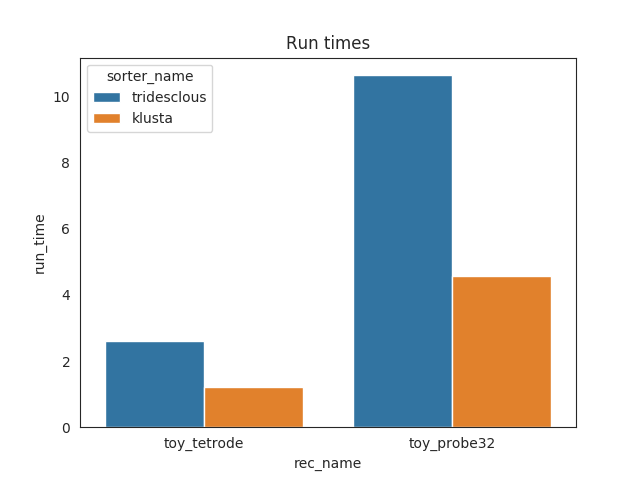

Text(0.5, 1.0, 'Run times')

In [12]:
run_times = dataframes['run_times'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=run_times, x='rec_name', y='run_time', hue='sorter_name', ax=ax)
ax.set_title('Run times')

<IPython.core.display.Javascript object>


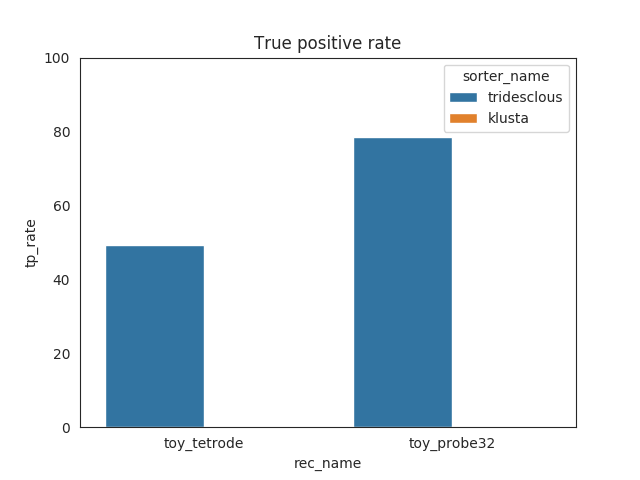

(0, 100)

In [15]:
perfs = dataframes['perf_pooled_with_sum'].reset_index()
fig, ax = plt.subplots()
sn.barplot(data=perfs, x='rec_name', y='tp_rate', hue='sorter_name', ax=ax)
ax.set_title('True positive rate')
ax.set_ylim(0, 100)

<IPython.core.display.Javascript object>


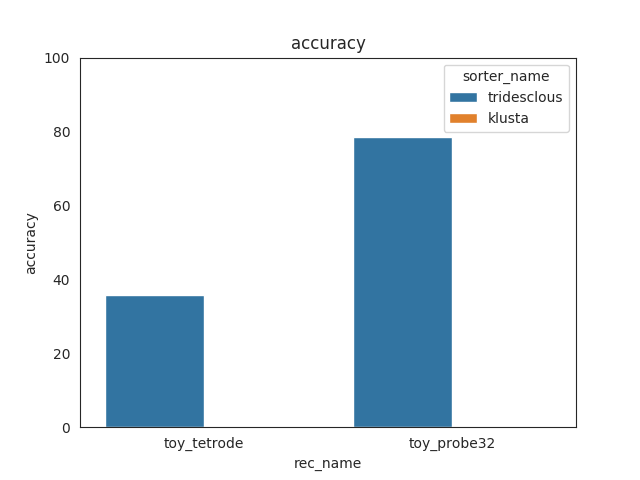

(0, 100)

In [16]:
perfs = dataframes['perf_pooled_with_sum'].reset_index()
fig, ax = plt.subplots()
ax = sn.barplot(data=perfs, x='rec_name', y='accuracy', hue='sorter_name', ax=ax)
ax.set_title('accuracy')
ax.set_ylim(0, 100)

## Et voilà!!